In [16]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings 
warnings.simplefilter('ignore') 

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [17]:
ddir = '~/Repositories/2022_SummerInternship_FarallonInstitute/saildrone_data/'  #data 2
fn_list = ['saildrone_west_coast_survey_2018_sd1026_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_west_coast_survey_2019_sd1047_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_west_coast_survey_2019_sd1043_JPLv5.0_8dy_20210613norep_20210613_20211116.nc']

In [22]:
# classxarray.Dataset(data_vars=None, coords=None, attrs=None)

sail = xr.open_dataset(ddir+fn_list[0])
sail["SDID"] = 0
if(len(fn_list)>1):
    for i in range(1, len(fn_list)):
        temp = xr.open_dataset(ddir+fn_list[i])
        temp["SDID"] = i
        sail = xr.concat([sail, temp], dim="time")
        temp.close()
sail

<xarray.Dataset>
Dimensions:                       (time: 305)
Coordinates:
    trajectory                    (time) object '1026.0' '1026.0' ... 1043.0
  * time                          (time) datetime64[ns] 2018-07-08 ... 2019-0...
    ob                            (time) int64 0 1 2 3 4 5 ... 34 35 36 37 38 39
Data variables: (12/42)
    lat                           (time) float64 37.72 37.68 ... 37.94 37.91
    lon                           (time) float64 -122.8 -122.9 ... -123.3 -123.1
    SOG_MEAN                      (time) float64 1.87 2.226 ... 0.7238 0.6173
    COG_MEAN                      (time) float64 237.8 239.4 ... 93.42 101.7
    HDG_MEAN                      (time) float64 235.1 245.4 ... 97.79 96.68
    PITCH_MEAN                    (time) float64 2.4 2.503 ... -0.2021 -0.1736
    ...                            ...
    dist_land                     (time) float64 9.655 19.11 ... 30.39 17.63
    analysed_sst                  (time) float64 287.5 287.5 ... 287.2 287.4
    analysis_error                (time) float64 0.4 0.4 0.39 ... 0.4 0.4 0.4
    mask                          (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    sea_ice_fraction              (time) float64 nan nan nan nan ... nan nan nan
    SDID                          (time) int64 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2
Attributes: (12/47)
    area:                      unassigned
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_resolution:  PT1M
    time_coverage_start:       2018-07-08T00:00:00Z
    title:                     Saildrone West Coast Survey 2018
    uuid:                      3e4ce677-18db-4ba8-9c73-f2c1f3ad15ce
    Westernmost_Easting:       -125.3254656
    vehicle_id:                sd1026

['lat', 'lon', 'SOG_MEAN', 'COG_MEAN', 'HDG_MEAN', 'PITCH_MEAN', 'BARO_PRES_MEAN', 'TEMP_AIR_MEAN', 'RH_MEAN', 'PAR_AIR_MEAN', 'UWND_MEAN', 'VWND_MEAN', 'WWND_MEAN', 'GUST_WND_MEAN', 'TEMP_CTD_MEAN', 'TEMP_CTD_STDDEV', 'SAL_CTD_MEAN', 'CHLOR_MEAN', 'ROLL_MEAN', 'TEMP_RBR_MEAN', 'SAL_RBR_MEAN', 'TEMP_O2_RBR_MEAN', 'CDOM_MEAN', 'CHLOR_WETLABS_MEAN', 'WIND_MEASUREMENT_HEIGHT_MEAN', 'sat_smap_sss', 'sat_anc_sss', 'sat_anc_sst', 'sat_smap_spd', 'sat_smap_high_spd', 'sat_weight', 'sat_land_fraction', 'sat_ice_fraction', 'sat_smap_sss_uncertainty', 'sat_lat', 'sat_lon', 'dist_land', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction', 'SDID']


what variable should be plotted: TEMP_CTD_MEAN


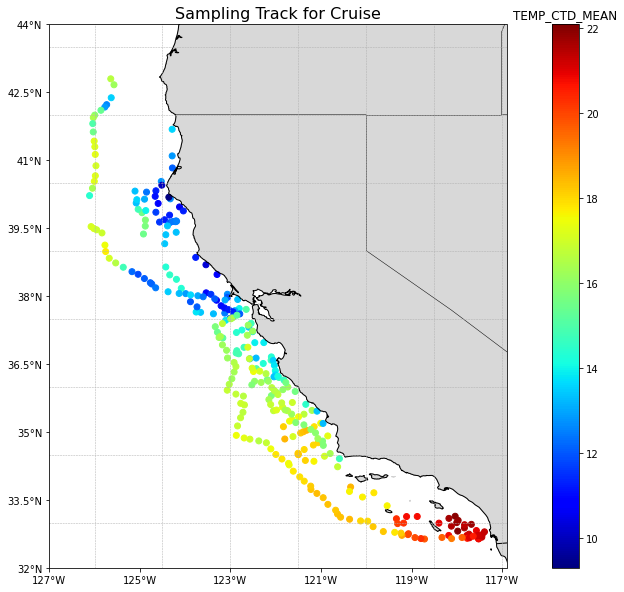

In [19]:


sail['date'] = mdates.date2num(sail['time'].dt.date)


print([i for i in sail.data_vars])
var_to_plot=input('what variable should be plotted:')


# default_x_ticks = range(0,max(sail[var_to_plot]),divmod(max(sail[var_to_plot]), 10)[0]) #selects out 10 evenly spaced dates from the data
#define latitude and longitude boundaries
latr = [min(sail['lat']), max(sail['lat'])] 
lonr = [max(sail['lon']), min(sail['lon'])] 

# Select a region of our data, giving it a margin
margin = 0.5 
region = np.array([[latr[0]-margin,latr[1]+margin],[lonr[0]+margin,lonr[1]-margin]]) 

#add state outlines
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Create and set the figure context
fig = plt.figure(figsize=(16,10), dpi = 72) 
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='10m',linewidth=1,color='black') 
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS)
ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.set_xticks(np.round([*np.arange(region[1,1],region[1,0]+1,2)][::-1],0), crs=ccrs.PlateCarree()) 
ax.set_yticks(np.round([*np.arange(np.floor(region[0,0]),region[0,1]+1,1.5)],1), crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

# Plot track data, color by temperature
loc = mdates.AutoDateLocator()
sc = plt.scatter(x = sail['lon'], y = sail['lat'], c = sail[var_to_plot], cmap='jet')
#plt.plot(sail['lon'], sail['lat'], ls = ':', c = 'navy', alpha = 0.4)
clb = fig.colorbar(sc, ticks=loc)
clb.ax.set_title(var_to_plot)
# clb.set_ticks(sail[var_to_plot][default_x_ticks])
plt.title('Sampling Track for Cruise', fontdict = {'fontsize' : 16})
plt.show()

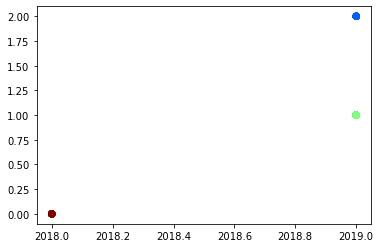

In [25]:
plt.scatter(x = sail['time'].dt.year, y = sail['SDID'], c = sail['time'].dt.dayofyear, cmap='jet')